![tracker](https://us-central1-vertex-ai-mlops-369716.cloudfunctions.net/pixel-tracking?path=statmike%2Fvertex-ai-mlops%2FApplied+GenAI&file=Grounding+Overview.ipynb)
<!--- header table --->
<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/statmike/vertex-ai-mlops/blob/main/Applied%20GenAI/Grounding%20Overview.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo">
      <br>Run in<br>Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https%3A%2F%2Fraw.githubusercontent.com%2Fstatmike%2Fvertex-ai-mlops%2Fmain%2FApplied%2520GenAI%2FGrounding%2520Overview.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo">
      <br>Run in<br>Colab Enterprise
    </a>
  </td>      
  <td style="text-align: center">
    <a href="https://github.com/statmike/vertex-ai-mlops/blob/main/Applied%20GenAI/Grounding%20Overview.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo">
      <br>View on<br>GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/statmike/vertex-ai-mlops/main/Applied%20GenAI/Grounding%20Overview.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo">
      <br>Open in<br>Vertex AI Workbench
    </a>
  </td>
</table>

---
This is part a [series of notebook based workflows](./readme.md) for Applided GenAI using Vertex AI.
Specifically, these are related to grounding methods for LLMs:

||Notebook Workflow|Description|
|---|---|---|
|**This Notebook**|[Grounding Overview](./Grounding%20Overview.ipynb)|Overview of grounding methods with comparison and evaluation|
||[Grounding Overview - Vertex AI Search](./Grounding%20Overview%20-%20Vertex%20AI%20Search.ipynb)|Setting up and using Vertex AI Search.|
||[Grounding Overview - RAG With BigQuery](./Grounding%20Overview%20-%20RAG%20With%20BigQuery.ipynb)|A Complete workflow (process, parse, embed, index, retrieve, generate) with BigQuery Vector Search.|
||[Grounding Overview - RAG With Vertex AI Feature Store](./Grounding%20Overview%20-%20RAG%20With%20Vertex%20AI%20Feature%20Store.ipynb)|A complete workflow (process, parse, embed, index, retrieve, generate) with Vertex AI Feature Store as anonline retrieval system over BigQuery data.|
||Grounding Overview - RAG With Vertex AI Vector Search|A complete workflow (process, parse, embed, index, retrieve, generate) with Vertex AI Vector Search as an online retrieval system.|
||Grounding Overview - RAG With LlamaIndex ON Vertex AI|A complete retrieval workflow (process, parse, embed, index, retrieve, generate) with LlamaIndex on Vertex AI as a retrieval system.|

---

# Grounding Overview

Harnessing an LLM to respond accuratly means supplying the correct relevant information to the prompt.  This notebook explores the ways Gemini and Vertex AI make this easy.

Methods covered:
- Ungrounded
    - Using the LLM to respond without any additional context for the question
- Grounded:
    - Perfect Information
        - Provide the LLM a context know to hold the information needed to answer the questions
    - Google Search
        - Let Gemini use Google Search to retrieve grounding information
    - Long Context
        - Provide a long context, like full document(s), audio, video, text, images that contain the answer within along with other information.
    - Vertex AI Agent Builder Search Agent Via Gemini API
        - Use Vertex AI Agent Builder data stores to process information for automatic retrieval
    - Vertex AI Agent Builder Search Agent with answering via native API (discoveryengine)
        - Use Vertex AI Agent Builder data stores to process information for automatic retrieval and automatically generated answers
    - Vertex AI Agent Builder Search Agent with answers from the configurable answers with follow-up API
        - Use Vertex AI Agent Builder data stores to process information for automatic retrieval and configurable answer generation
    - Vertex AI Agent Builder Search Agent Extractive Segments as RAG
        - Use Vertex AI Agent Builder data stores to process information for directed retrieval, like automated RAG, via extrative segments
    - Use custom RAG, in this case process documents into chunks with Document AI Layout Parser, the use the embeddings API to embed chunk, store both chunks and embeddings in BigQuery and surface for embedding matching in Feature Store Online Store synced from BigQuery
        - Use the Feature Store API to retrieve matches to search queries in a single pass
    - Refine custom RAG by using the Vertex AI Agent Builder reranking API to rerank and filter chunks with the question/query known
        - Retrieve chunk from Feature Store API and Rerank the chunk (and filter) with the Vertex AI Agent Builder reranking API
        
The Vertex AI Rapid Evaluation API is used to evaluate the quality of question answering provided by each of the method.


**Prerequisites**

Some of the methods make use of Vertex AI Agent Builder Data Stores or Vertex AI Feature Store.  These workflows have been presetup by the accompanying notebook workflows listed below.  Running those notebooks first with enable these methods withing this notebook:
- [Grounding Overview - Vertex AI Search](./Grounding%20Overview%20-%20Vertex%20AI%20Search.ipynb)
- [Grounding Overview - RAG With Vertex AI Feature Store](./Grounding%20Overview%20-%20RAG%20With%20Vertex%20AI%20Feature%20Store.ipynb)
- [Grounding Overview - RAG With BigQuery](./Grounding%20Overview%20-%20RAG%20With%20BigQuery.ipynb)

---
## Colab Setup

To run this notebook in Colab click [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/statmike/vertex-ai-mlops/blob/main/Applied%20GenAI/Getting%20Started%20-%20Vertex%20AI%20GenAI%20Python%20Client.ipynb) and run the cells in this section.  Otherwise, skip this section.

This cell will authenticate to GCP (follow prompts in the popup).

In [1]:
PROJECT_ID = 'statmike-mlops-349915' # replace with project ID

In [2]:
try:
    import google.colab
    from google.colab import auth
    auth.authenticate_user()
    !gcloud config set project {PROJECT_ID}
except Exception:
    pass

---
## Installs

The list `packages` contains tuples of package import names and install names.  If the import name is not found then the install name is used to install quitely for the current user.

In [3]:
# tuples of (import name, install name, min_version)
packages = [
    ('google.cloud.aiplatform', 'google-cloud-aiplatform', '1.62.0'),
    ('google.cloud.discoveryengine', 'google-cloud-discoveryengine')
]

import importlib
install = False
for package in packages:
    if not importlib.util.find_spec(package[0]):
        print(f'installing package {package[1]}')
        install = True
        !pip install {package[1]} -U -q --user
    elif len(package) == 3:
        if importlib.metadata.version(package[0]) < package[2]:
            print(f'updating package {package[1]}')
            install = True
            !pip install {package[1]} -U -q --user

### Restart Kernel (If Installs Occured)

After a kernel restart the code submission can start with the next cell after this one.

In [4]:
if install:
    import IPython
    app = IPython.Application.instance()
    app.kernel.do_shutdown(True)
    IPython.display.display(IPython.display.Markdown("""<div class=\"alert alert-block alert-warning\">
        <b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. The previous cells do not need to be run again⚠️</b>
        </div>"""))

---
## Setup

inputs:

In [5]:
project = !gcloud config get-value project
PROJECT_ID = project[0]
PROJECT_ID

'statmike-mlops-349915'

In [6]:
REGION = 'us-central1'
SERIES = 'applied-genai'
EXPERIMENT = 'grounding-overview'

Prerequisites:

In [7]:
# Vertex Agent Builder Data Store
VS_LOCATION = 'global'
VS_DATASTORE_ID = f"{SERIES}-{EXPERIMENT}"

# Feature Store Feature View:
FS_FEATURE_VIEW = f"projects/1026793852137/locations/us-central1/featureOnlineStores/{SERIES.replace('-', '_')}/featureViews/{EXPERIMENT.replace('-', '_')}"

packages:

In [8]:
from google.cloud import aiplatform

import vertexai.vision_models # Imagen Models
import vertexai.preview.vision_models
import vertexai.language_models
import vertexai.generative_models # for Gemini Models

import google.cloud.discoveryengine_v1 as discoveryengine
import google.cloud.discoveryengine_v1alpha as discoveryengine_alpha

import json
import base64
import requests
from IPython.display import Markdown as display

In [9]:
aiplatform.__version__

'1.62.0'

clients:

In [10]:
# Vertex AI
vertexai.init(project = PROJECT_ID, location = REGION)

# Vertex AI Agent Builder
API_ENDPOINT = dict(api_endpoint = (f'{VS_LOCATION}-' if VS_LOCATION != 'global' else '') + 'discoveryengine.googleapis.com')
datastore_client = discoveryengine.DataStoreServiceClient(client_options = API_ENDPOINT)
search_client = discoveryengine.SearchServiceClient(client_options = API_ENDPOINT)
check_grounding_client = discoveryengine.GroundedGenerationServiceClient(client_options = API_ENDPOINT)

models: [Google Models](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/models#models)

In [11]:
models = dict(
    gemini_pro = vertexai.generative_models.GenerativeModel("gemini-1.5-pro-001"),
    gemini_flash = vertexai.generative_models.GenerativeModel("gemini-1.5-flash-001"),
    imagen = vertexai.preview.vision_models.ImageGenerationModel.from_pretrained("imagegeneration@006"), #"imagen-3.0-generate-001"
    embedding = vertexai.language_models.TextEmbeddingModel.from_pretrained('text-embedding-004')
)

generation configs:

In [12]:
grounding_config = vertexai.generative_models.GenerationConfig(
    temperature = 0.0
)

grounding tools:

In [13]:
google_search = vertexai.generative_models.Tool.from_google_search_retrieval(
    vertexai.generative_models.grounding.GoogleSearchRetrieval()
)

In [14]:
from vertexai.preview.generative_models import grounding

In [15]:
datastore = datastore_client.get_data_store(
    name = datastore_client.collection_path(
        project = PROJECT_ID,
        location = VS_LOCATION,
        collection = 'default_collection'
    ) + f'/dataStores/{VS_DATASTORE_ID}'
)

In [16]:
vertex_search = vertexai.generative_models.Tool.from_retrieval(
    grounding.Retrieval(
        grounding.VertexAISearch(
            datastore.name
        )
    )
)

Feature Store Feature View:

In [18]:
try:
    from vertexai.resources.preview.feature_store.feature_view import FeatureView
except Exception as err:
    print('Retry')

In [19]:
fsv = FeatureView(name = FS_FEATURE_VIEW)

---
## Prompt And Context

The [official rules of baseball](https://img.mlbstatic.com/mlb-images/image/upload/mlb/wqn5ah4c3qtivwx3jatm.pdf), a pdf that is updated annually with the latest changes to the game and published by MLB.


In [20]:
prompt = "what are the dimensions of first base in baseball?"

In [21]:
url = 'https://img.mlbstatic.com/mlb-images/image/upload/mlb/wqn5ah4c3qtivwx3jatm.pdf'
# get the pdf
context_bytes = requests.get(url).content
context_base64 = base64.b64encode(context_bytes).decode('utf-8')
context = vertexai.generative_models.Part.from_data(data = context_base64, mime_type = 'application/pdf')

In [22]:
gold = "## 2.03 The Bases\nFirst, second and third bases shall be marked by white canvas or rubber-covered bags, securely attached to the ground as indicated in Diagram 2. The first and third base bags shall be entirely within the infield. The second base bag shall be centered on second base. The bags shall be 18 inches square, not less than three nor more than five inches thick, and filled with soft material."
display(gold)

## 2.03 The Bases
First, second and third bases shall be marked by white canvas or rubber-covered bags, securely attached to the ground as indicated in Diagram 2. The first and third base bags shall be entirely within the infield. The second base bag shall be centered on second base. The bags shall be 18 inches square, not less than three nor more than five inches thick, and filled with soft material.

---
## Ungrounded - Just The LLM

Directly send a query to a LLM, Gemini 1.5 Pro in this case, without any additional context (grounding).

- [Gemini API Quickstart](https://cloud.google.com/vertex-ai/generative-ai/docs/start/quickstarts/quickstart-multimodal)

In [183]:
ungrounded = models['gemini_pro'].generate_content(prompt)
display(ungrounded.text)

First base in baseball is a 15-inch square.  Here's a breakdown:

* **All sides are equal:** 15 inches 
* **Shape:** Square

**Important Note:** While the base itself is 15 inches, it's only the portion extending into foul territory that is white. The rest of the base is typically canvas colored and sits flush with the ground within the infield. 


---
## Grounded: With Perfect Context

In cases of factual queries a perfext context may be identifiable as was the exact section of the source rules document above and stored in the variable `gold`.  In most cases the retrieval of this information is part of the design of the workflow as presented in multiple grounding options that follow below.

In [184]:
grounded_perfect = models['gemini_pro'].generate_content([gold, prompt])
display(grounded_perfect.text)

According to the text you provided, first base should be:

* **Shape:** Square
* **Size:** 18 inches by 18 inches
* **Thickness:** Not less than 3 inches, nor more than 5 inches 


---
## Grounded: With Google Search

The Gemini API has tools for directly grounding with Google Search, retriving additional context from Google search results.
- [Ground Gemini Models With Google Search](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/ground-gemini#web-ground-gemini)

In [181]:
grounded_with_googlesearch = models['gemini_pro'].generate_content(prompt, generation_config = grounding_config, tools = [google_search])
display(grounded_with_googlesearch.text)

First base is a square bag, typically made of canvas or rubber. As of September 2022, a regulation size base in Major League Baseball measures 18 inches on each side. 


---
## Grounded: Multimodal Long Context

The [Gemini models on Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/models) have very long input context windows (2M Tokens for 1.5 Pro, 1M Tokens for 1.5 Flash).  This means entire corpos of text, documents, images, video, audio, could be provide as context/grounding for a call:
- [Gemini Long Context](https://cloud.google.com/vertex-ai/generative-ai/docs/long-context)
    - [Image Understanding](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/image-understanding)
    - [Video Understanding](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/video-understanding)
    - [Audio Understanding](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/audio-understanding)
    - [Document Understanding](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/document-understanding)

In [153]:
grounded_with_longcontext = models['gemini_pro'].generate_content([context, prompt], generation_config = grounding_config)
display(grounded_with_longcontext.text)

First base is 18 inches square, not less than three nor more than five inches thick, and filled with soft material. 

---
## Grounded: Vertex AI Search

Using [Vertex AI Agent Builder](https://cloud.google.com/generative-ai-app-builder/docs/introduction) To build a search experience with [Vertex AI Search](https://cloud.google.com/generative-ai-app-builder/docs/enterprise-search-introduction) means using a service to process, annotate, chunk, embed, store, index and retreive search and generated response.  This can also be directly used as a tool for the Gemini API to automatially retrieve custom grounding:
- [Ground Gemini Models With Your Data](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/ground-gemini#private-ground-gemini)

This setup and usage of Vertex AI Search is covered in the companion, prerequisite workflow, found here:
- [Grounding Overview - Vertex AI Search](./Grounding%20Overview%20-%20Vertex%20AI%20Search.ipynb)

In [238]:
grounded_with_vertexsearch = models['gemini_pro'].generate_content(prompt, generation_config = grounding_config, tools = [vertex_search])
display(grounded_with_vertexsearch.text)

First base is a square that measures 15 inches by 15 inches. 


---
## Grounded: Vertex AI Search With Answer

Grounded answers from Gemini models can also be directly generated from the Vertex AI Search API.  For even more examples of retrivinng search results and generated answers check out the companion, prerequisite workflow, found here:
- [Grounding Overview - Vertex AI Search](./Grounding%20Overview%20-%20Vertex%20AI%20Search.ipynb)

In [240]:
search_results = search_client.search(
    request = discoveryengine.SearchRequest(
        serving_config = f"projects/{PROJECT_ID}/locations/{VS_LOCATION}/collections/default_collection/dataStores/{VS_DATASTORE_ID}/servingConfigs/default_config",
        query = prompt,
        page_size = 10, 
        content_search_spec = discoveryengine.SearchRequest.ContentSearchSpec(
            snippet_spec = discoveryengine.SearchRequest.ContentSearchSpec.SnippetSpec(
                return_snippet = True
            ),
            # generative summary specs:
            summary_spec = discoveryengine.SearchRequest.ContentSearchSpec.SummarySpec(
                summary_result_count = 5, # number of documents (or chunks in chunk mode) to use for generative summary
                include_citations = True,
                ignore_adversarial_query = True,
                ignore_non_summary_seeking_query = False,
                model_spec = discoveryengine.SearchRequest.ContentSearchSpec.SummarySpec.ModelSpec(
                    version = "stable"
                ),
            ),
            extractive_content_spec = discoveryengine.SearchRequest.ContentSearchSpec.ExtractiveContentSpec(
                max_extractive_answer_count = 5,
                max_extractive_segment_count = 10,
                return_extractive_segment_score = True,
                num_previous_segments = 0,
                num_next_segments = 0
            ),
        ),
        query_expansion_spec = discoveryengine.SearchRequest.QueryExpansionSpec(
            condition = discoveryengine.SearchRequest.QueryExpansionSpec.Condition.AUTO
        ),
        spell_correction_spec = discoveryengine.SearchRequest.SpellCorrectionSpec(
            mode = discoveryengine.SearchRequest.SpellCorrectionSpec.Mode.AUTO
        )
    )
)
display(search_results.summary.summary_text)

First base in baseball is located 90 feet from home plate and 90 feet from second base. The intersection of these lines establishes first base. Home base is marked by a five-sided slab of whitened rubber. The slab is a 17-inch square with two corners removed. The remaining sides are 8.5 inches and 12 inches. 


---
## Grounded: Vertex AI Search Answers API

The Vertex AI Search API also has a search method via the Answer API whcih gives control over the query phase, answer phase, and ability to configure follow-up quesitons.  
- [Get answers and follow-ups](https://cloud.google.com/generative-ai-app-builder/docs/answer)

For more examples of the answer method check out the companion, prerequisite workflow, here:
- [Grounding Overview - Vertex AI Search](./Grounding%20Overview%20-%20Vertex%20AI%20Search.ipynb)

In [156]:
token = !gcloud auth application-default print-access-token
headers = {
  "content-type": "application/json",
  "Authorization": f'Bearer {token[0]}'
}
response = requests.post(
  f'https://discoveryengine.googleapis.com/v1beta/projects/{PROJECT_ID}/locations/{VS_LOCATION}/collections/default_collection/dataStores/{VS_DATASTORE_ID}/servingConfigs/default_search:answer',
  data = json.dumps(dict(query = dict(text = prompt))),
  headers = headers
)
answer = json.loads(response.text)
display(answer['answer']['answerText'])

First base in baseball is marked by a white canvas or rubber-covered bag. The bag is 18 inches square and between 3 and 5 inches thick. It is filled with soft material. The first and third base bags must be entirely within the infield. The second base bag must be centered on second base. 


---
## Grounded: RAG With Vertex AI Search

Vertex AI Search Can Return:
- [Search Results](https://cloud.google.com/generative-ai-app-builder/docs/preview-search-results)
    - A list of documents with urls that are related to the search query
- [Snippets](https://cloud.google.com/generative-ai-app-builder/docs/snippets#snippets)
    - A brief text extracted from each search result
- [Extractive Answers](https://cloud.google.com/generative-ai-app-builder/docs/snippets#extractive-answers)
    - Verbatim text for extracted from each search result that answers the search query
- [Extractive Segments](https://cloud.google.com/generative-ai-app-builder/docs/snippets#extractive-segments)
    - Verbatim text that is more verbose than extractive answers
- [Search Summaries](https://cloud.google.com/generative-ai-app-builder/docs/get-search-summaries)
    - An LLM generated response to the search query.
    
    
The extractive segments make great context for grounding LLMs.  Check out all of these methods of search in the companion, prerequisite workflow, here:
- [Grounding Overview - Vertex AI Search](./Grounding%20Overview%20-%20Vertex%20AI%20Search.ipynb)

### Retrieval

In [33]:
retrieved_context = "Context as segments extracted from source documents:\n"
for result in search_results.results:
    document = dict(result.document.derived_struct_data)
    if 'extractive_segments' in document.keys():
        for s, segment in enumerate(document['extractive_segments']):
            retrieved_context += f"\n- Segment {s+1} (page = {segment['pageNumber']}): {segment['content']}"

In [71]:
#display(retrieved_context)

### Generation

In [36]:
grounded_with_rag_vertexsearch = models['gemini_pro'].generate_content([retrieved_context, prompt], generation_config = grounding_config)
display(grounded_with_rag_vertexsearch.text)

The text you provided describes the layout and dimensions of the entire baseball field, but it doesn't explicitly state the dimensions of first base itself. 

However, it *does* tell us this about first base:

* **Rule 2.03:** "First, second and third bases shall be marked by white canvas or rubber-covered bags... The bags shall be **18 inches square**, not less than three nor more than five inches thick, and filled with soft material."

Therefore, first base is **18 inches by 18 inches**. 


---
## Grounded: RAG With Vertex AI Feature Store Over BigQuery

In the prerequisite notebook [Grounding Overview - RAG With Vertex AI Feature Store](./Grounding%20Overview%20-%20RAG%20With%20Vertex%20AI%20Feature%20Store.ipynb) a retrieval database is setup using:
- Document AI [Layout Parser](https://cloud.google.com/document-ai/docs/layout-parse-chunk) to parse and chunk documents
- [Vertex AI Embeddings APIs](https://cloud.google.com/vertex-ai/generative-ai/docs/embeddings) to create embeddings for each chunk
- BigQuery to store all chunks and embeddings in a single table
- [Vertex AI Feature Store](https://cloud.google.com/vertex-ai/docs/featurestore/latest/overview) to sync the BigQuery source to an online Feature View
- Vertex AI Feature Store API to retrieve matching chunks based on input embeddings the represent the search query

### Retrieval

In [27]:
results = fsv.search(
    embedding_value = models['embedding'].get_embeddings([prompt])[0].values,
    neighbor_count = 20,
    return_full_entity = True
).to_dict()['neighbors']

Public endpoint for the optimized online store applied_genai is 5096931286090514432.us-central1-1026793852137.featurestore.vertexai.goog


In [28]:
matches = []
for result in results:
    for feature in result['entity_key_values']['key_values']['features']:
        if feature['name'] == 'content':
            matches.append(dict(
                chunk_id = result['entity_id'],
                distance = result['distance'],
                content = feature['value']['string_value']
            ))

In [29]:
for m, match in enumerate(matches): print(f"{m+1} - chunk_id: {match['chunk_id']} with distance: {match['distance']}")

1 - chunk_id: c32 with distance: -0.7050017714500427
2 - chunk_id: c39 with distance: -0.6960663795471191
3 - chunk_id: c31 with distance: -0.691490650177002
4 - chunk_id: c24 with distance: -0.6890405416488647
5 - chunk_id: c60 with distance: -0.6760091781616211
6 - chunk_id: c29 with distance: -0.6737022399902344
7 - chunk_id: c838 with distance: -0.6642963886260986
8 - chunk_id: c30 with distance: -0.6638877391815186
9 - chunk_id: c38 with distance: -0.661100447177887
10 - chunk_id: c28 with distance: -0.6602258086204529
11 - chunk_id: c59 with distance: -0.6543205976486206
12 - chunk_id: c37 with distance: -0.6491357088088989
13 - chunk_id: c41 with distance: -0.6488881707191467
14 - chunk_id: c23 with distance: -0.6433005332946777
15 - chunk_id: c40 with distance: -0.6430721879005432
16 - chunk_id: c25 with distance: -0.6380656361579895
17 - chunk_id: c61 with distance: -0.6375458836555481
18 - chunk_id: c36 with distance: -0.6370067000389099
19 - chunk_id: c837 with distance: -0.

In [30]:
retrieved_context = "Context presented as chunks of text extracted from source documents:\n"
for match in matches:
    retrieved_context += f"\n- Chunk {match['chunk_id']}: {match['content']}"

In [31]:
#display(retrieved_context)

In [34]:
print(matches[16]['chunk_id'], '\n\n', matches[14]['content'])

c61 

 # Rule 2.03 to 2.05

## 2.03 The Bases

First, second and third bases shall be marked by white canvas or rubber-covered bags, securely attached to the ground as indicated in Diagram 2. The first and third base bags shall be entirely within the infield. The second base bag shall be centered on second base. The bags shall be 18 inches square, not less than three nor more than five inches thick, and filled with soft material.


### Generation

In [35]:
grounded_with_rag_vertexfs = models['gemini_pro'].generate_content([retrieved_context, prompt], generation_config = grounding_config)
display(grounded_with_rag_vertexfs.text)

The provided text snippets describe the layout and dimensions of the baseball field, but they don't explicitly state the dimensions of first base itself. 

However, we can glean the following information about first base:

* **Shape:** First base is a square.
* **Material:** It's a white canvas or rubber-covered bag filled with soft material.
* **Size:**  It's 18 inches square and between 3 and 5 inches thick.
* **Placement:** The base is positioned entirely within the infield, with its location determined by the intersection of lines drawn from home plate and second base, both measuring 90 feet.

Therefore, while the exact dimensions of first base aren't explicitly stated, we know it's an **18-inch square, 3-5 inches thick**. 


In [37]:
grounded_with_rag_vertexfs = models['gemini_pro'].generate_content([retrieved_context, prompt, 'State which chunk helped answer the question.'], generation_config = grounding_config)
display(grounded_with_rag_vertexfs.text)

This question cannot be answered from the given source. Although there is plenty of information about the layout of a baseball field, including the dimensions of home plate and the pitcher's plate, there is no information about the dimensions of first base. 


---
## Grounded: RAG+Reranking With Vertex AI Feature Store Over BigQuery

Extending RAG from the Feature Store implementation in the previous example, this further refines the retrieved documents/chunks by using the ranking API from Vertex AI Agent Builder which takes chunks and the question/query as inputs and calculates relationships to reorder and filter the chunks based on input parameters. 

Vertex AI Agent Builder has serveral helpful APIs for grounding, including:
- [Ranking API](https://cloud.google.com/generative-ai-app-builder/docs/ranking)
    - Rank chunks based on relationship to a query. Use above in RAG methods.
    
Here the Ranking API is used rank and filter the retrieved content from the previous section:

- [Discoveryengine Python Ranking Service Client](https://cloud.google.com/python/docs/reference/discoveryengine/latest/google.cloud.discoveryengine_v1.services.rank_service)

### Re-ranking Retrieval

In [38]:
reranker = discoveryengine.RankServiceClient()

rank_results = reranker.rank(
    request = discoveryengine.RankRequest(
        ranking_config = reranker.ranking_config_path(
            project = PROJECT_ID,
            location = "global",
            ranking_config = "default_ranking_config",
        ),
        model = "semantic-ranker-512@latest",
        top_n = 5,
        query = prompt,
        records = [
            discoveryengine.RankingRecord(
                id = match['chunk_id'],
                content = match['content']
            ) for match in matches
        ]
    )
)

In [39]:
for m, match in enumerate(rank_results.records): print(f"{m+1} - chunk_id: {match.id} with distance: {match.score}")

1 - chunk_id: c31 with distance: 0.75
2 - chunk_id: c40 with distance: 0.7300000190734863
3 - chunk_id: c60 with distance: 0.7099999785423279
4 - chunk_id: c38 with distance: 0.7099999785423279
5 - chunk_id: c61 with distance: 0.6899999976158142


In [41]:
retrieved_context = "Context presented as chunks of text extracted from source documents:\n"
for match in rank_results.records:
    retrieved_context += f"\n- Chunk {match.id}: {match.content}"

In [42]:
#display(retrieved_context)

### Generation

In [43]:
grounded_with_ragrank_vertexfs = models['gemini_pro'].generate_content([retrieved_context, prompt], generation_config = grounding_config)
display(grounded_with_ragrank_vertexfs.text)

The text chunks you provided don't explicitly state the dimensions of first base. However, they do mention the following:

* **Chunk c40:** "The first and third base bags shall be entirely within the infield. The... base bags shall be **18 inches square**, not less than three nor more than five inches thick, and filled with soft material."

Therefore, we can infer that first base is an **18-inch square**. 


---
## Grounded Generation API

While multiple ways above covered generation with inline context, Google Search and even directly and indirectly using Vertex AI Search data stores, this section will showcase a single API that is capable of all of these.

Vertex AI Agent Builder has several helpful APIs for grounding, including:
- [Grounded Generation API](https://cloud.google.com/generative-ai-app-builder/docs/grounded-gen)
    - Ground on Vertex AI Search, Google Search, or with inline context
    
Here the grounded generation API is used guide responses with retrieval from Google Search, Vertex AI Search and inline text:

- [Discoveryengine Python Grounded Generationn Service Client](https://cloud.google.com/python/docs/reference/discoveryengine/latest/google.cloud.discoveryengine_v1.services.grounded_generation_service)

**WAITING ON RELEASE OF FEATURE TO FULL PREVIEW**

---
## Checking Grounding

Vertex AI Agent Builder has several helpful APIs for grounding, including:
- [Check Groundingk API](https://cloud.google.com/generative-ai-app-builder/docs/check-grounding)
    - assess grounded-ness of responses
    
Here the check grounding API is used to check the response from techniques used above:

- [Discoveryengine Python Grounded Generation Service Client](https://cloud.google.com/python/docs/reference/discoveryengine/latest/google.cloud.discoveryengine_v1.services.grounded_generation_service)

In [46]:
ground_check = check_grounding_client.check_grounding(
    request = discoveryengine.CheckGroundingRequest(
        grounding_config = check_grounding_client.grounding_config_path(
            project = PROJECT_ID,
            location = VS_LOCATION,
            grounding_config = "default_grounding_config",
        ),
        answer_candidate = grounded_with_ragrank_vertexfs.text,
        facts = [
            discoveryengine.GroundingFact(fact_text = chunk.content)
            for chunk in rank_results.records
        ],
        grounding_spec = discoveryengine.CheckGroundingSpec(citation_threshold = 0.6),
    )
)

In [48]:
ground_check

support_score: 0.517510414
cited_chunks {
  chunk_text: "# Rule 2.03 to 2.05\n\n## 2.03 The Bases\n\nFirst, second and third bases shall be marked by white canvas or rubber-covered bags, securely attached to the ground as indicated in Diagram 2. The first and third base bags shall be entirely within the infield. The second base bag shall be centered on second base. The bags shall be 18 inches square, not less than three nor more than five inches thick, and filled with soft material."
  source: "1"
}
claims {
  start_pos: 0
  end_pos: 81
  claim_text: "The text chunks you provided don\'t explicitly state the dimensions of first base."
  grounding_check_required: false
}
claims {
  start_pos: 82
  end_pos: 121
  claim_text: "However, they do mention the following:"
  grounding_check_required: false
}
claims {
  start_pos: 123
  end_pos: 208
  claim_text: "* **Chunk c40:** \"The first and third base bags shall be entirely within the infield."
  grounding_check_required: true
}
claims {
  

---
## Evaluation With Rapid Evaluation Service

Make use over the Vertex AI rapid evaluation API to automatically evaluate responses for desired metrics.  In this case each of the method above generated answers are passed along with request metric groups related to question answers (quality, helpfulness, correctness and relevance).

[Generative AI evaluation service overview](https://cloud.google.com/vertex-ai/generative-ai/docs/models/evaluation-overview)

In [185]:
from vertexai.preview.evaluation import EvalTask
import pandas as pd

In [186]:
metrics = ['question_answering_quality', 'question_answering_helpfulness', 'question_answering_correctness', 'question_answering_relevance']

In [194]:
eval_dataset = pd.DataFrame(
  {
    "instruction": [prompt]*10,
    "context":  [gold]*10,
    "response":  [
        ungrounded.text,
        grounded_perfect.text,
        grounded_with_googlesearch.text,
        grounded_with_longcontext.text,
        grounded_with_vertexsearch.text,
        search_results.summary.summary_text,
        answer['answer']['answerText'],
        grounded_with_rag_vertexsearch.text,
        grounded_with_rag_vertexfs.text,
        grounded_with_ragrank_vertexfs.text
    ],
    "reference": ['First base is 18 inches square.']*10,
    "method": [
        'ungrounded',
        'grounded-perfect',
        'grounded-googlesearch',
        'grounded-longcontext',
        'grounded-vertexsearch',
        'grounded-vertexsearch-API',
        'grounded-vertexsearch-answers API',
        'grounded-rag-vertexsearch',
        'grounded-rag-featuresstore',
        'grounded-rag-rerank-featurestore'
    ]
  }
)

In [195]:
eval_task = EvalTask(
  dataset = eval_dataset,
  metrics = metrics
)

In [196]:
evaluation = eval_task.evaluate()

Computing metrics with a total of 40 Vertex online evaluation service requests.


/home/jupyter/.local/lib/python3.10/site-packages/vertexai/preview/evaluation/_evaluation.py:118: UserWarning: After google-cloud-aiplatform>1.61.0, using metric name `question_answering_quality` will result in an error. Please use metric constant as Pointwise.QUESTION_ANSWERING_QUALITY or define a PointwiseMetric instead.
  warnings.warn(
/home/jupyter/.local/lib/python3.10/site-packages/vertexai/preview/evaluation/_evaluation.py:118: UserWarning: After google-cloud-aiplatform>1.61.0, using metric name `question_answering_helpfulness` will result in an error. Please use metric constant as Pointwise.QUESTION_ANSWERING_HELPFULNESS or define a PointwiseMetric instead.
  warnings.warn(
/home/jupyter/.local/lib/python3.10/site-packages/vertexai/preview/evaluation/_evaluation.py:118: UserWarning: After google-cloud-aiplatform>1.61.0, using metric name `question_answering_correctness` will result in an error. Please use metric constant as Pointwise.QUESTION_ANSWERING_CORRECTNESS or define a 

All 40 metrics are successfully computed.
Evaluation Took:159.5115136669483 seconds


In [197]:
evaluation.summary_metrics

{'row_count': 10,
 'question_answering_quality/mean': 2.0,
 'question_answering_quality/std': 1.4142135623730951,
 'question_answering_helpfulness/mean': 3.1,
 'question_answering_helpfulness/std': 1.1972189997378648,
 'question_answering_correctness/mean': 0.5,
 'question_answering_correctness/std': 0.5270462766947299,
 'question_answering_relevance/mean': 2.8,
 'question_answering_relevance/std': 1.8135294011647258}

In [198]:
evaluation.metrics_table

instruction  \
0  what are the dimensions of first base in baseb...   
1  what are the dimensions of first base in baseb...   
2  what are the dimensions of first base in baseb...   
3  what are the dimensions of first base in baseb...   
4  what are the dimensions of first base in baseb...   
5  what are the dimensions of first base in baseb...   
6  what are the dimensions of first base in baseb...   
7  what are the dimensions of first base in baseb...   
8  what are the dimensions of first base in baseb...   
9  what are the dimensions of first base in baseb...   

                                             context  \
0  ## 2.03 The Bases\nFirst, second and third bas...   
1  ## 2.03 The Bases\nFirst, second and third bas...   
2  ## 2.03 The Bases\nFirst, second and third bas...   
3  ## 2.03 The Bases\nFirst, second and third bas...   
4  ## 2.03 The Bases\nFirst, second and third bas...   
5  ## 2.03 The Bases\nFirst, second and third bas...   
6  ## 2.03 The Bases\nFirst, second and third bas...   
7  ## 2.03 The Bases\nFirst, second and third bas...   
8  ## 2.03 The Bases\nFirst, second and third bas...   
9  ## 2.03 The Bases\nFirst, second and third bas...   

                                            response  \
0  First base in baseball is a 15-inch square.  H...   
1  According to the text you provided, first base...   
2  First base is a square bag, typically made of ...   
3  First base is 18 inches square, not less than ...   
4                 First base is a 15-inch square. \n   
5  First base is located at the intersection of t...   
6  First base in baseball is marked by a white ca...   
7  The text you provided describes the layout and...   
8  First base is 18 inches square. This informati...   
9  The text chunks you provided don't contain the...   

                         reference                             method  \
0  First base is 18 inches square.                         ungrounded   
1  First base is 18 inches square.                   grounded-perfect   
2  First base is 18 inches square.              grounded-googlesearch   
3  First base is 18 inches square.               grounded-longcontext   
4  First base is 18 inches square.              grounded-vertexsearch   
5  First base is 18 inches square.          grounded-vertexsearch-API   
6  First base is 18 inches square.  grounded-vertexsearch-answers API   
7  First base is 18 inches square.          grounded-rag-vertexsearch   
8  First base is 18 inches square.         grounded-rag-featuresstore   
9  First base is 18 inches square.   grounded-rag-rerank-featurestore   

              question_answering_quality/explanation  \
0  STEP 1: Assess groundedness: the response ment...   
1  STEP 1: Groundedness: The response cites evide...   
2  STEP 1: GROUNDEDNESS: The response is partiall...   
3  STEP 1: Groundedness: The response correctly i...   
4  STEP 1: Assess groundedness: the response is n...   
5  STEP 1: GROUNDEDNESS: The response mentions in...   
6  STEP 1: GROUNDEDNESS: The response is grounded...   
7  STEP 1: Groundedness: The response hallucinate...   
8  STEP 1: Groundedness: The response correctly i...   
9  STEP 1: Groundedness: The response is NOT grou...   

   question_answering_quality/confidence  question_answering_quality  \
0                                    1.0                         1.0   
1                                    0.8                         5.0   
2                                    0.9                         2.0   
3                                    0.5                         4.0   
4                                    1.0                         1.0   
5                                    1.0                         1.0   
6                                    0.9                         2.0   
7                                    0.0                         1.0   
8                                    1.0                         2.0   
9                                    1.0         

---
## Bring Responses To Life With Images

Use the Imagen image generation model to generate an image related to the question and answer.

[Imagen On Vertex AI Overview](https://cloud.google.com/vertex-ai/generative-ai/docs/image/overview)

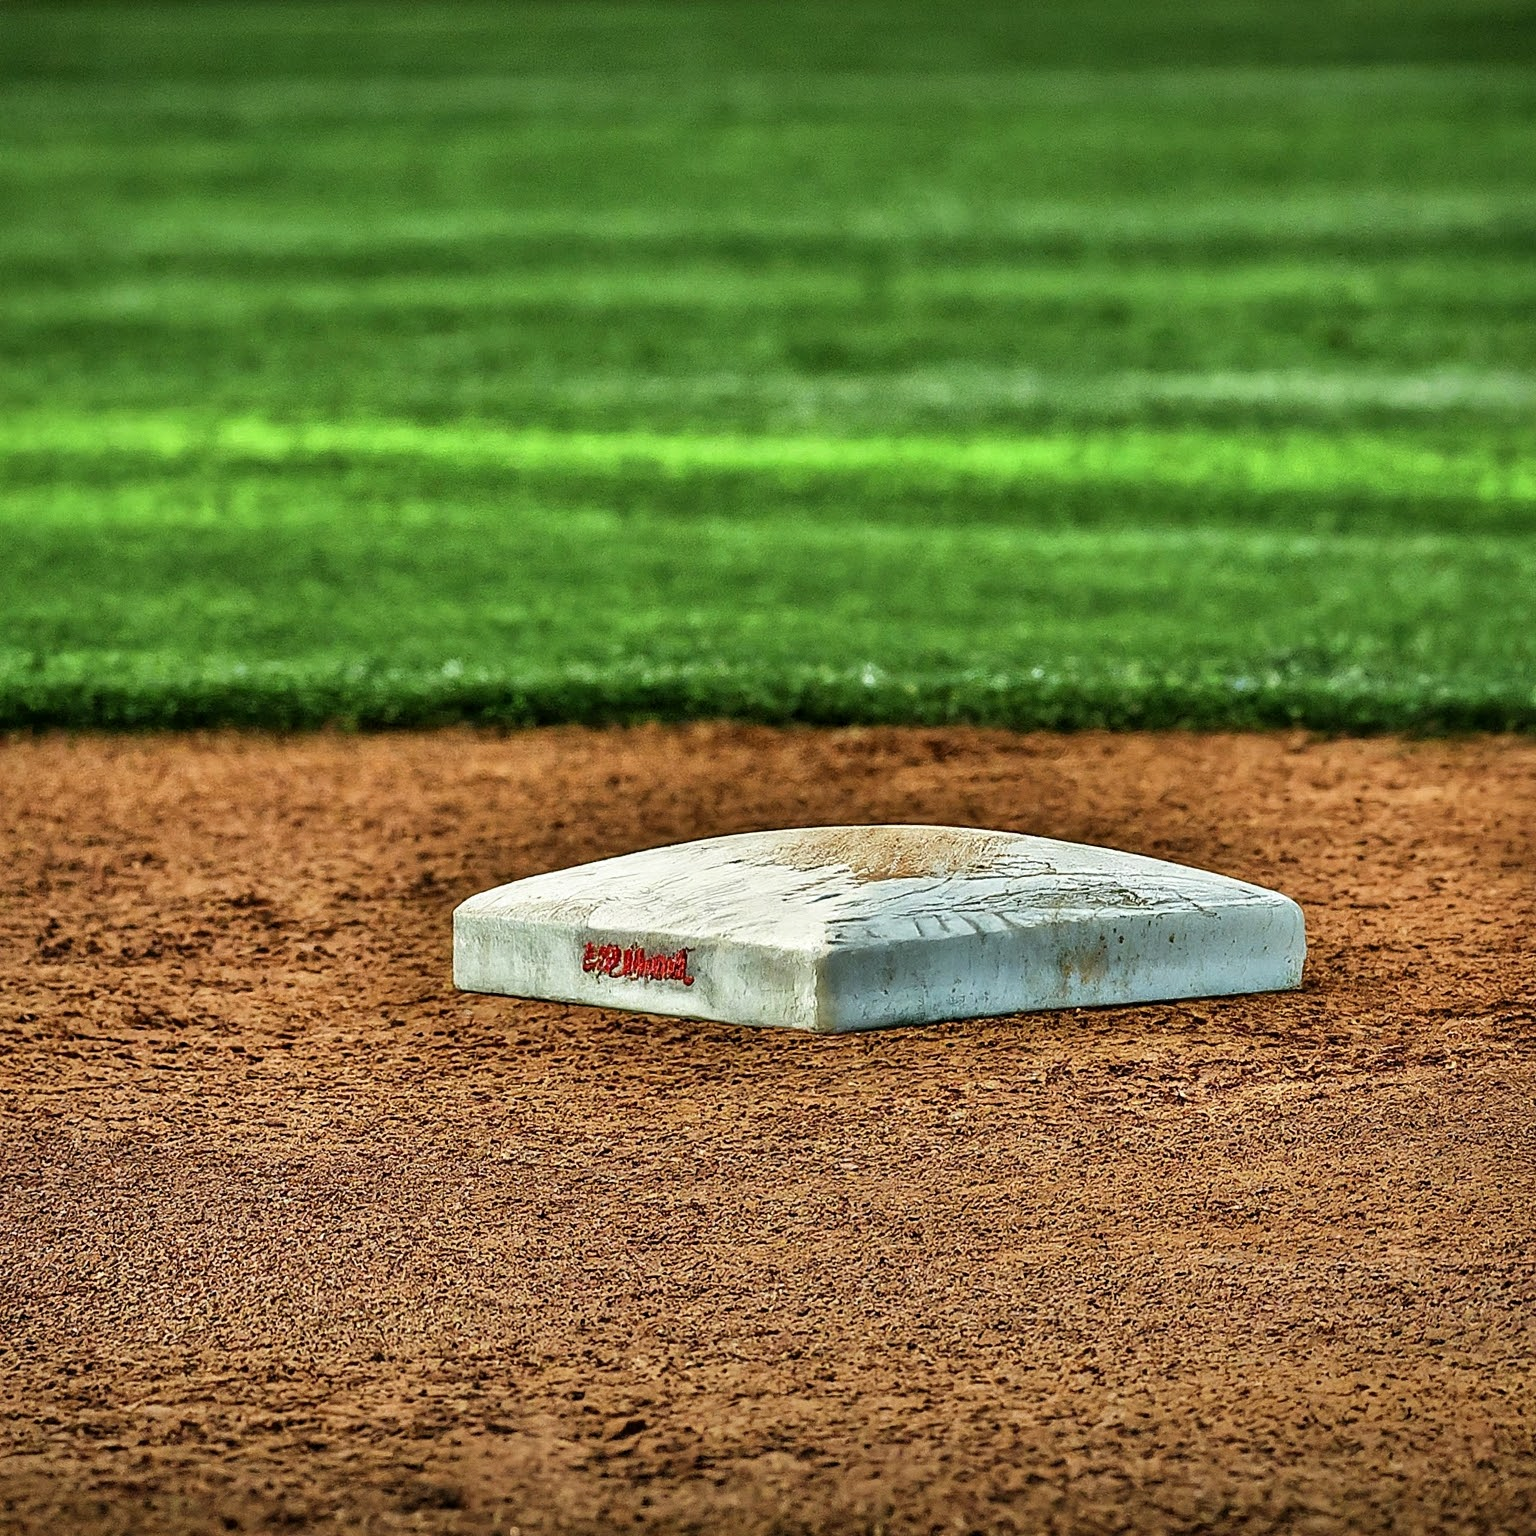

In [67]:
images = models['imagen'].generate_images(
    prompt = f'For the question: {prompt}\nI got the answer: {grounded_with_longcontext.text}\nCreate an image to bring this to life!',
    number_of_images = 1,
    aspect_ratio = "1:1"
)
images[0].show()